In [7]:
from bs4 import BeautifulSoup
import requests #brings content to my pc
import html5lib #parse the content


In [8]:
#scraping local websites
with open('home.html', 'r') as html_file:
    content = html_file.read()
    print(content)

FileNotFoundError: [Errno 2] No such file or directory: 'home.html'

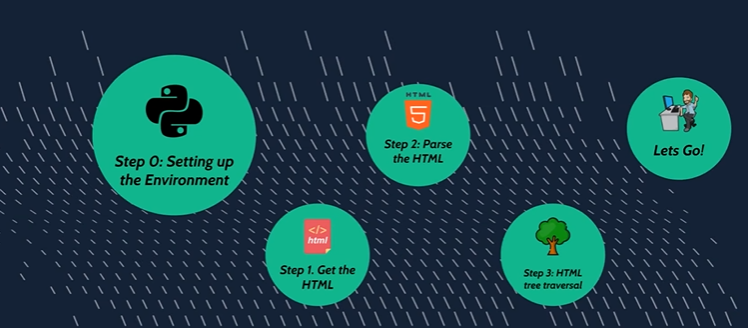

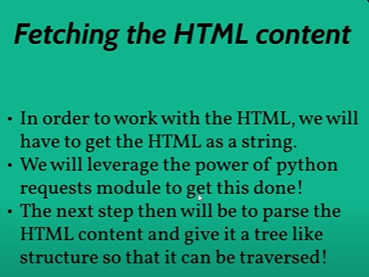
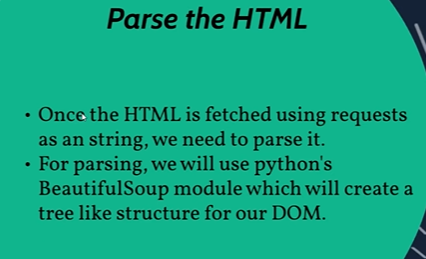
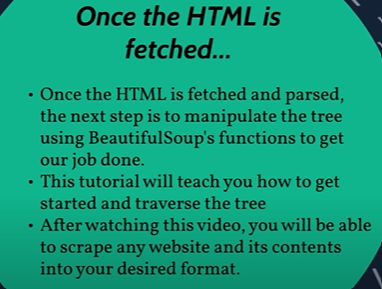


In [9]:
#to scrap a website:
###1. use the API
###2. HTML web scraping using some tool like bs4

url = "https://byjus.com/"

#STEP 1: Get the HTML'
r = requests.get(url) #all content will go in r
htmlcontent = r.content


In [12]:
#step 2: parse the HTML
soup = BeautifulSoup(htmlcontent, 'html.parser')
#print(soup)
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<base href="https://byjus.com/"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="index,follow" name="robots"/>
<title>BYJU'S Online learning Programs For K3, K10, K12, NEET, JEE, UPSC &amp; Bank Exams</title><meta content="BYJU'S comprehensive e-learning programs for K3, K10, K12, NEET, JEE, UPSC &amp; Bank Exams from India's best teachers. Join today to fall in love with learning" name="description"/>
<meta content="" property="og:title">
<meta content="article" property="og:type">
<meta content="https://byjus.com/" property="og:url">
<meta content="https://cdn1.byjus.com/images/fb-share-button-k10-k12.png" property="og:image">
<meta content="" property="og:description">
<meta content="BYJU'S" property="og:site_name"/>
<meta content="image/png" property="og:image:type"/>
<meta content="1200" property

#step 3: HTML Tree traversal
### our soup is a tree, 
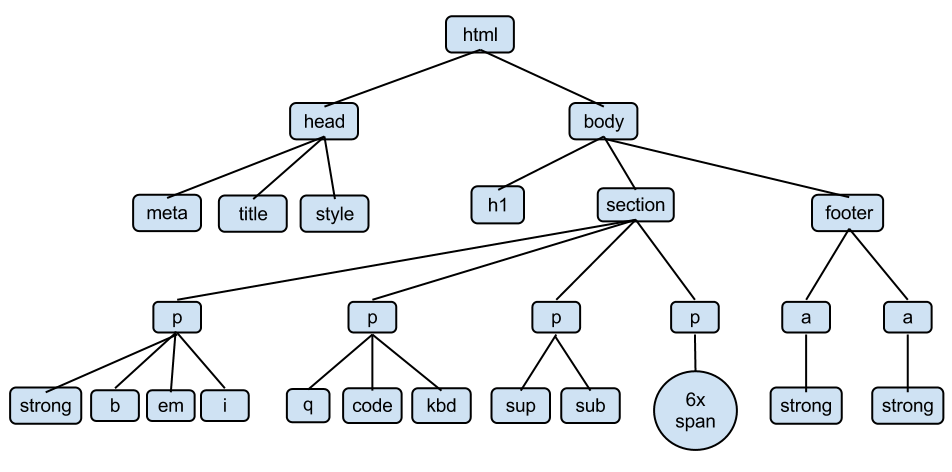

In [16]:
#commonly used types of objects 
#1. Tag
#2. Navigablestring
#3. BeautifulSoup
#4. Comment

title = soup.title #get's title of html page
print(type(soup))
print(type(title))
print(type(title.string))

<class 'bs4.BeautifulSoup'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [18]:
#Get all paragraphs from page
paras = soup.find_all('p')
#ssimilarly, to get all anchor tabs, use anchor = soup.find_all('a')

In [19]:
#to get first element
print(soup.find('p'))
#to get classes
print(soup.find('p')['class'])

<p class="trial-form-title-sub-desc">Learn from India's best teachers</p>
['trial-form-title-sub-desc']


In [25]:
#find all the elements with class lead
print(soup.find_all('p', class_='lead'))

[]


In [29]:
#Gett the text from the elements/tags/soup
print(soup.find('p').get_text())

Learn from India's best teachers


In [36]:
anchors = soup.find_all('a')
all_links = set()
#get all the links from the page
for link in anchors:
    if(link.get('href') != '#'):
        linktext = link.get('href')
        all_links.add(linktext)
        print(linktext)
        #used set because if links repeat they won't be appended in our list

/
https://students.byjus.com/oauth/authorize?client_id=1f267a0cb39bfe566e0218659508cb1949be4bdea023351a989a1b80b7d0c460&redirect_uri=https%3A%2F%2Flearn.byjus.com%2Fcallback%3FpagePath%3D%252Fpremium-school%252Fdashboard%3Fmx_Source_of_Lead%3Dbyjus-web%26utm_campaign%3DENCODED_UTM_CAMPAIGN%26utm_medium%3Dwebsite%26utm_source%3DENCODED_UTM_SOURCE%26mx_Page_Category%3DENCODED_PAGE_CATEGORY&response_type=token&scope=profile+manage_doubts&mx_Source_of_Lead=byjus-web&utm_medium=website&utm_source=ENCODED_UTM_SOURCE&utm_campaign=ENCODED_UTM_CAMPAIGN&mx_Page_Category=ENCODED_PAGE_CATEGORY&referrer=mx_Source_of_Lead=byjus-web%26utm_medium=website%26utm_source%3DENCODED_UTM_SOURCE%26utm_campaign%3DENCODED_UTM_CAMPAIGN%26mx_Page_Category=ENCODED_PAGE_CATEGORY
tel:+919243500460
None
/question-answer/
/ncert-solutions/
/ncert-solutions-class-12/
/ncert-solutions-class-12-physics/
/ncert-solutions-class-12-chemistry/
/ncert-solutions-class-12-biology/
/ncert-solutions-class-12-maths/
/ncert-solutio

In [45]:
#.contents = a tag's children are available as a list
#.children = a tag's children are available as a generator 

IE = soup.find(id='geo-country-selection-popup')
for elem in IE.children:
    print(elem)



<div class="geo-country-selection-popup text-center">
<div class="container">
<div class="row">
<div class="col-xs-12 col-sm-6">
<div class="geo-country-selection-text">
Choose another country or region to see content specific to your location.
</div>
<span class="close visible-xs" id="closeBtn" onclick="closeBtn()"></span>
</div>
<div class="col-xs-8 col-sm-4">
<div class="geo-country-selection-dropdown">
<form>
<div class="form-group">
<select class="form-control" data-country-dropdown="" id="country">
</select>
</div>
</form>
</div>
</div>
<div class="col-xs-4 col-sm-2">
<input class="btn btn-info countinue-btn" onclick="continueFun('')" role="button" type="button" value="Continue"/>
<span class="close hidden-xs" id="closeBtn" onclick="closeBtn()"></span>
</div>
</div>
</div>
</div>




In [46]:
for item in IE.strings:
    print(item)












Choose another country or region to see content specific to your location.











































In [47]:
for item in IE.stripped_strings:
    print(item)

Choose another country or region to see content specific to your location.


In [48]:
print(IE.parent)

<body class="home page-template page-template-home page-template-index page-template-homeindex-php page page-id-65690 slug-home-2">
<script>
        var loadDeferredStyles = function() {
        var addStylesNode = document.getElementById("deferred-styles");
        var replacement = document.createElement("div");
        replacement.innerHTML = addStylesNode.textContent;
        document.body.appendChild(replacement);
        document.body.className += " font-loaded";
        addStylesNode.parentElement.removeChild(addStylesNode);
        };
        var raf = requestAnimationFrame || mozRequestAnimationFrame ||
            webkitRequestAnimationFrame || msRequestAnimationFrame;
        if (raf) raf(function() { window.setTimeout(loadDeferredStyles, 0); });
        else window.addEventListener('load', loadDeferredStyles);
	</script>
<script type="text/javascript">
		var axel = Math.random() + "";
		var a = axel * 10000000000000;
		document.write('<iframe src="https://6478929.fls.double